In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc

In [54]:
csv_chunks = pd.read_csv( 'Train.csv' ,chunksize = 100000 , nrows = 30000000 )
# concatenate chunks back into one dataframe
#dataset = pd.concat(chunk for chunk in csv_chunks)
#data_predicted = dataset.loc[dataset[ 'is_attributed' ] == 1 ]
# Save to excel

#writer = pd.ExcelWriter('/Users/ZacBurns/Documents/School/4th Year/Data Science Project - Data/output.xlsx')
#data_predicted.to_excel(writer, 'Sheet1' )
#writer.save()

In [55]:

#df = pd.read_csv("/Users/ZacBurns/Documents/School/4th Year/Data Science Project - Data/train_samplev2.csv", header = 0)
df = pd.read_csv("/Users/ZacBurns/Documents/School/4th Year/Data Science Project - Data/train.csv", header = 0)
#df_test = pd.read_csv("/Users/ZacBurns/Documents/School/4th Year/Data Science Project - Data/test.csv", header = 0)
df.head()
df.describe()



KeyboardInterrupt: 

In [ ]:
from sklearn import preprocessing
df = pd.get_dummies(df, columns = ['device','os'], drop_first = True)



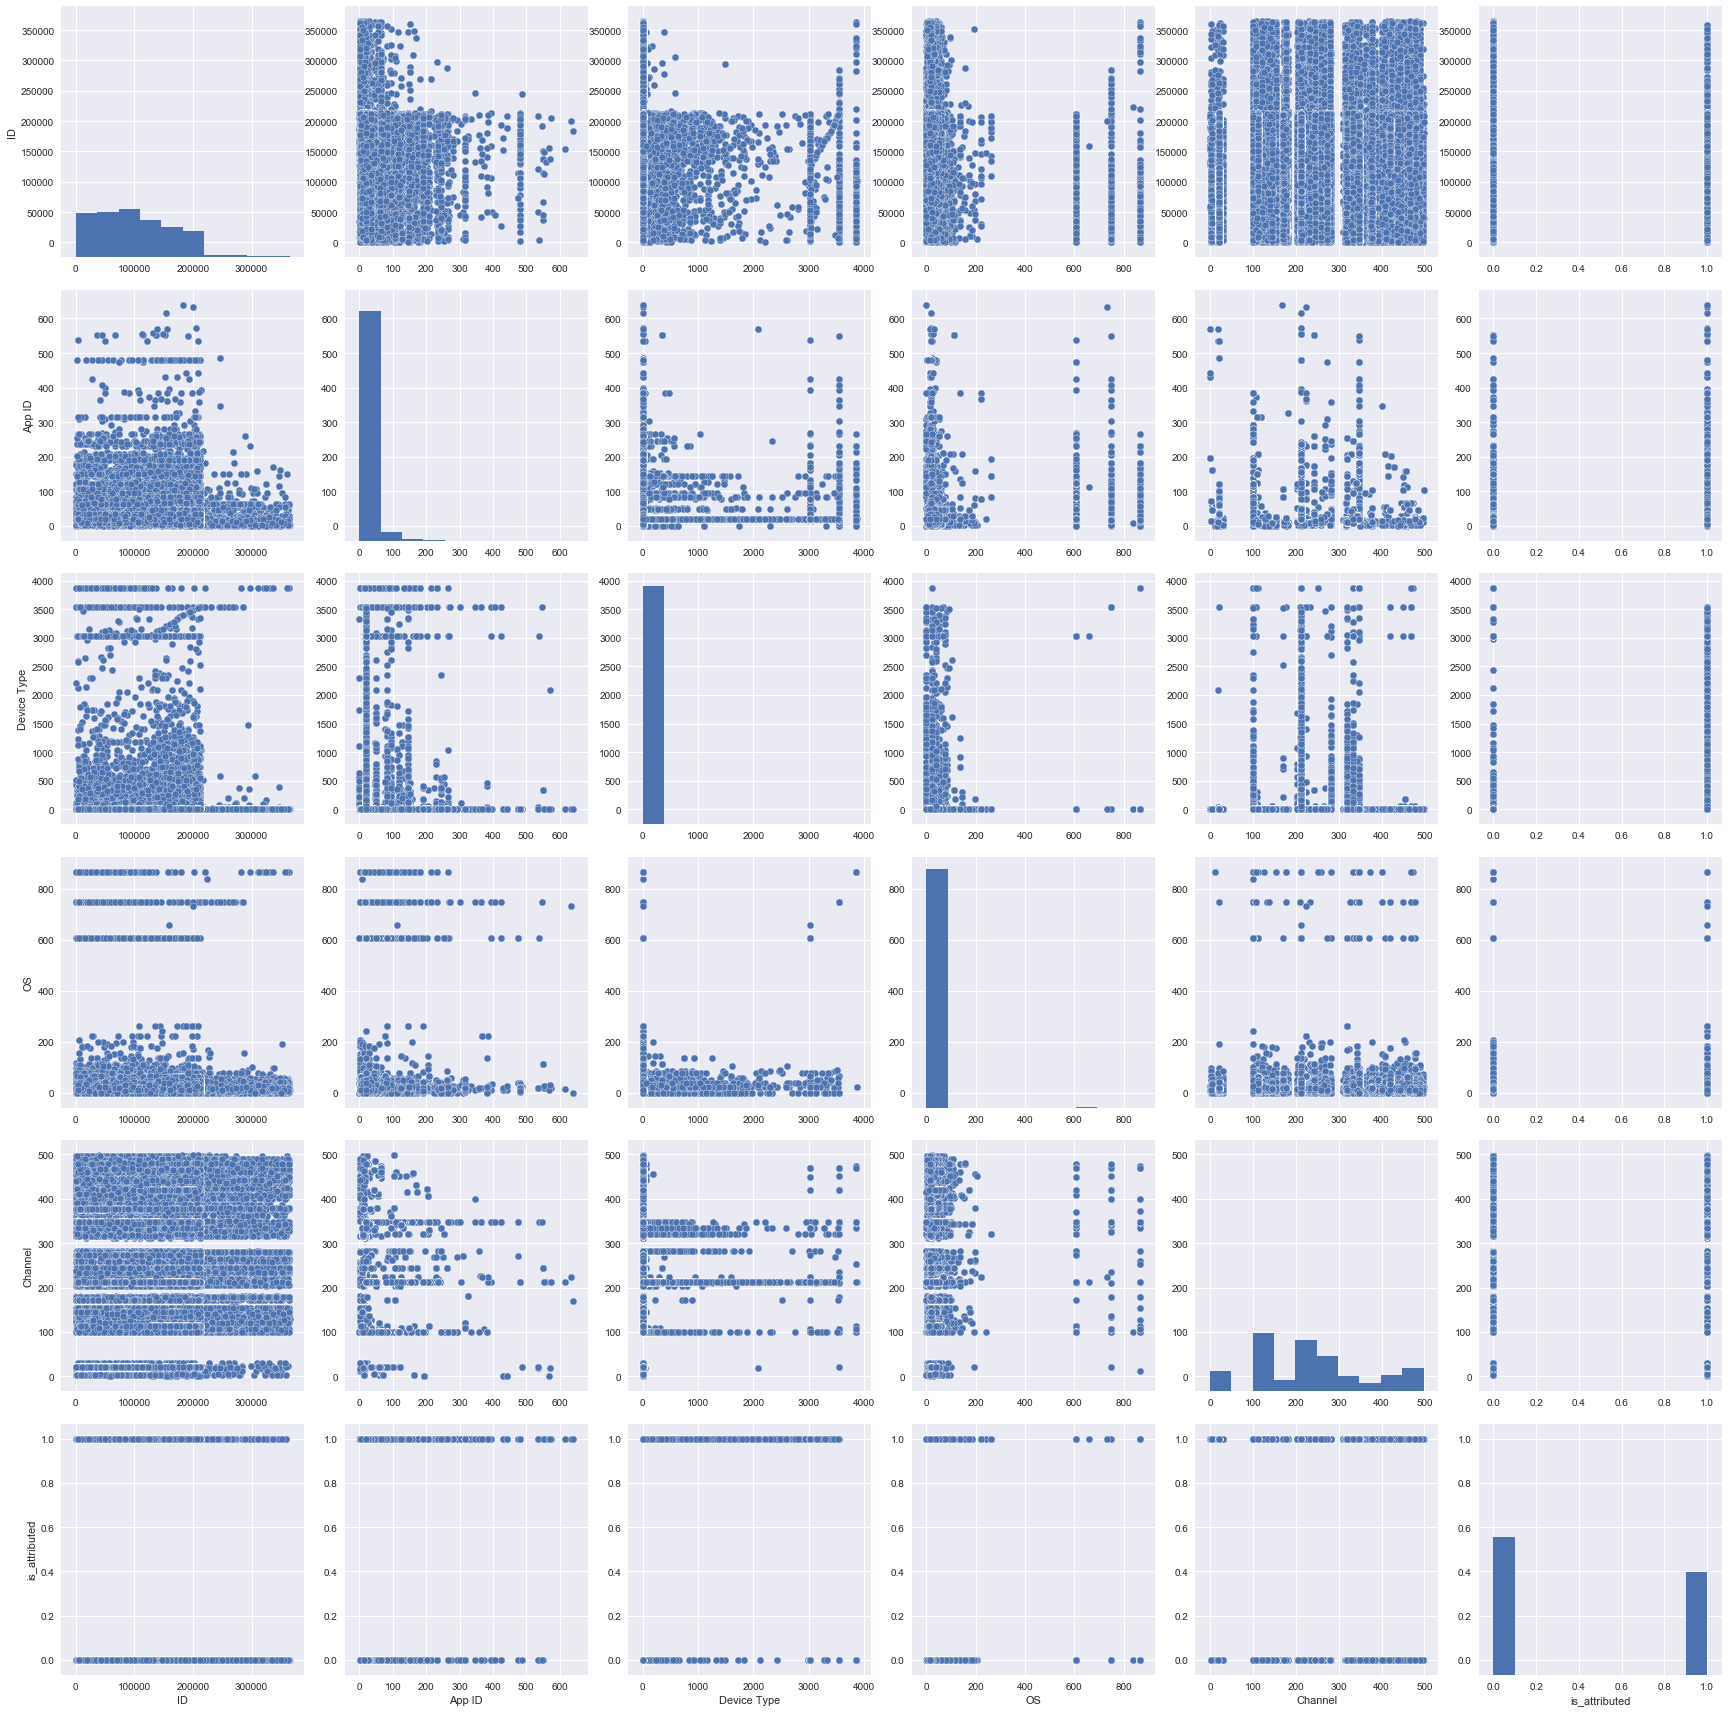

In [25]:
sns.pairplot(df, size=4);

Accuracy: 75.17%


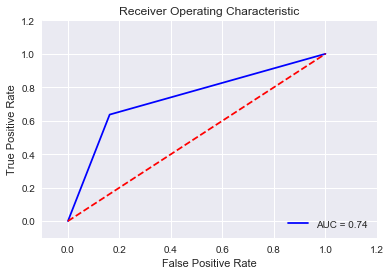

In [50]:
# Open columns
df = df.drop(['click_time','attributed_time'], axis = 1)


X = df.iloc[:, 0:5]
Y = df.iloc[:,5]

seed = 7
test_size = 0.80

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

size_actual = int(174723*test_size)

actual = dataset.values[:size_actual,5]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#plot ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 90.36%


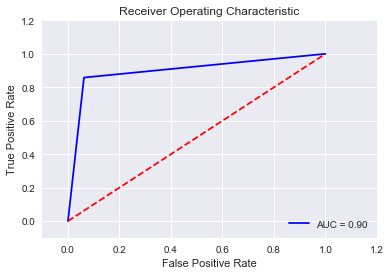

In [51]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

size_actual = int(174723 *test_size)
actual = dataset.values[:size_actual, 5 ]

accuracy = accuracy_score(y_test, predictions)
print( "Accuracy: %.2f%%" % (accuracy * 100.0 ))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 91.88%


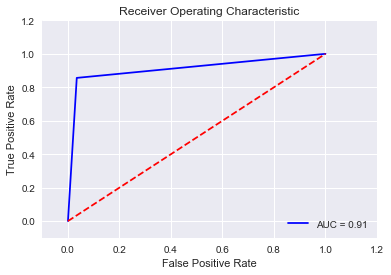

In [52]:
model = XGBClassifier(max_depth = 5 , min_child_weight= 1 , gamma= 0 , subsample = 1 , colsample_bytree = 1 , learning_rate= 0.3 , seed = 1 )
model.fit(X_train, y_train)


# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
size_actual = int( 174723 *test_size)
actual = dataset.values[:size_actual, 5 ]

accuracy = accuracy_score(y_test, predictions)
print( "Accuracy: %.2f%%" % (accuracy * 100.0 ))

#plot ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,
y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title( 'Receiver Operating Characteristic' )
plt.plot(false_positive_rate, true_positive_rate, 'b' ,
label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc= 'lower right' )
plt.plot([ 0 , 1 ],[ 0 , 1 ], 'r--' )
plt.xlim([ -0.1 , 1.2 ])
plt.ylim([ -0.1 , 1.2 ])
plt.ylabel( 'True Positive Rate' )
plt.xlabel( 'False Positive Rate' )
plt.show()
